In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import string
from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/d.dasarathan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/d.dasarathan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/d.dasarathan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/d.dasarathan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
df = pd.read_csv('fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [3]:
df.shape

(40432, 4)

In [4]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [6]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


----------------------------------------------------------------------------------------------------

In [8]:
wn = WordNetLemmatizer()

In [9]:
# Pre-Processed News Dataset 1
# 1. set reviews to lowercase
# 2. remove urls
# 3. remove stopwords
# 4. remove punctuation
# 5. lemmatize words

from string import punctuation

def lemmatize_preprocessed_news(news_excerpt):
    '''
    Input:
        news_excerpt: a string containing a news excerpt.
    Output:
        news_excerpt_cleaned: a preprocessed and lemmatized news excerpt

    '''
    # Set news excerpt to lowercase
    lowercase_news_excerpt = news_excerpt.lower()
    
    # Remove links from lowercase news excerpt
    urls_removed_news_excerpt = re.sub(r"https?://\S+", "", lowercase_news_excerpt)
    
    # Remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    words = urls_removed_news_excerpt.split()
    stopwords_removed = [word for word in words if word not in stop_words]

    # Change tokenized words back into a string for removal of punctuation
    text = ' '.join(word for word in stopwords_removed)
    
    # Remove punctuation from news excerpt
    punctuation_removed_news_excerpt = ''.join(char for char in text if char not in punctuation)

    # Tokenize words in news excerpt
    words = word_tokenize(punctuation_removed_news_excerpt)
    
    # Lemmatize words
    lemmatized_words = [wn.lemmatize(word) for word in words]
    
    # Convert list of words back to string
    cleaned_news_excerpt = ' '.join(word for word in lemmatized_words)
    
    return cleaned_news_excerpt

In [10]:
# Pre-Processed News Dataset 2
# 1. set reviews to lowercase
# 2. remove urls
# 3. remove stopwords
# 4. remove punctuation
# 5. stem words

def stemmed_preprocessed_news(news_excerpt):
    '''
    Input:
        news_excerpt: a string containing a news excerpt.
    Output:
        news_excerpt_cleaned: a preprocessed and lemmatized news excerpt

    '''
    # Set news excerpt to lowercase
    lowercase_news_excerpt = news_excerpt.lower()
    
    # Remove links from lowercase news excerpt
    urls_removed_news_excerpt = re.sub(r"https?://\S+", "", lowercase_news_excerpt)
    
    # Remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    words = urls_removed_news_excerpt.split()
    stopwords_removed = [word for word in words if word not in stop_words]

    # Change tokenized words back into a string for removal of punctuation
    text = ' '.join(word for word in stopwords_removed)
    
    # Remove punctuation from news excerpt
    punctuation_removed_news_excerpt = ''.join(char for char in text if char not in punctuation)

    # Tokenize words in news excerpt
    words = word_tokenize(punctuation_removed_news_excerpt)
    
    # Stem words
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Convert list of words back to string
    cleaned_news_excerpt = ' '.join(word for word in stemmed_words)
    
    return cleaned_news_excerpt

In [11]:
# Pre-Processed News Dataset 3
# 1. set reviews to lowercase
# 2. remove urls
# 3. remove stopwords
# 4. remove punctuation

def preprocess_news(news_excerpt):
    '''
    Input:
        news_excerpt: a string containing a news excerpt.
    Output:
        news_excerpt_cleaned: a preprocessed and lemmatized news excerpt

    '''
    # Set news excerpt to lowercase
    lowercase_news_excerpt = news_excerpt.lower()
    
    # Remove links from lowercase news excerpt
    urls_removed_news_excerpt = re.sub(r"https?://\S+", "", lowercase_news_excerpt)
    
    # Remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    words = urls_removed_news_excerpt.split()
    stopwords_removed = [word for word in words if word not in stop_words]

    # Change tokenized words back into a string for removal of punctuation
    text = ' '.join(word for word in stopwords_removed)
    
    # Remove punctuation from news excerpt
    punctuation_removed_news_excerpt = ''.join(char for char in text if char not in punctuation)

    # Tokenize words in news excerpt
    words = word_tokenize(punctuation_removed_news_excerpt)
    
    # Convert list of words back to string
    cleaned_news_excerpt = ' '.join(word for word in words)
    
    return cleaned_news_excerpt

In [12]:
#df["lemmatized_text_"] = df["text_"].apply(lemmatize_preprocessed_news)
#df["stemmed_text_"] = df["text_"].apply(stemmed_preprocessed_news)
df["cleaned_text_"] = df["text_"].apply(preprocess_news)
#df["lemmatized_tokens"] = df["lemmatized_text_"].str.split(" ")
#df["stemmed_tokens"] = df["stemmed_text_"].str.split(" ")
df.head()

,category,rating,label,text_,cleaned_text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",love this well made sturdy comfortable love it...
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",love it great upgrade original ive mine couple...
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,pillow saved back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",missing information use it great product price
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,nice set good quality set two months


In [13]:
## Train Test split
#X = df.drop(['label'], axis=1).copy()
#X = df[['category','rating','lemmatized_text_','stemmed_text_']].copy()
X = df[['category','rating','text_']].copy()
y= df['label'].copy()

In [14]:
X.category = X.category.astype(str)
X.rating = X.rating.astype(str)

In [15]:
categories = X.category.unique().tolist()
ratings = X.rating.unique().tolist()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.35)

In [17]:
print('x_train shape : ',x_train.shape)
print('x_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

x_train shape :  (26280, 3)
x_test shape :  (14152, 3)
y_train shape :  (26280,)
y_test shape :  (14152,)


In [18]:
y_train.value_counts()

CG    13151
OR    13129
Name: label, dtype: int64

In [19]:
y_test.value_counts()

OR    7087
CG    7065
Name: label, dtype: int64

In [20]:
y_train= preprocessing.label_binarize(y_train, classes =['CG','OR'])
y_test = preprocessing.label_binarize(y_test, classes =['CG','OR'])

In [21]:
categories

['Home_and_Kitchen_5',
 'Sports_and_Outdoors_5',
 'Electronics_5',
 'Movies_and_TV_5',
 'Tools_and_Home_Improvement_5',
 'Pet_Supplies_5',
 'Kindle_Store_5',
 'Books_5',
 'Toys_and_Games_5',
 'Clothing_Shoes_and_Jewelry_5']

In [22]:
ratings

['5.0', '1.0', '3.0', '2.0', '4.0']

In [23]:
ohe_transformer  = make_column_transformer(
    (OneHotEncoder(categories = [categories],handle_unknown='ignore',sparse=False),['category']),
    (OneHotEncoder(categories = [ratings],handle_unknown='ignore',sparse=False),['rating']),
    verbose=False,
    remainder='passthrough',
    n_jobs = -1)

In [24]:
ohe_x_train = ohe_transformer.fit_transform(x_train[['category','rating']])

ohe_category_cols = ohe_transformer.transformers_[0][1].get_feature_names_out( ['category']).tolist()
ohe_rating_cols = ohe_transformer.transformers_[1][1].get_feature_names_out( ['rating']).tolist()
ohe_cols = ohe_category_cols + ohe_rating_cols

x_train_ohe = pd.DataFrame(ohe_x_train, columns=ohe_cols)
x_train_ohe.head()

,category_Home_and_Kitchen_5,category_Sports_and_Outdoors_5,category_Electronics_5,category_Movies_and_TV_5,category_Tools_and_Home_Improvement_5,category_Pet_Supplies_5,category_Kindle_Store_5,category_Books_5,category_Toys_and_Games_5,category_Clothing_Shoes_and_Jewelry_5,rating_5.0,rating_1.0,rating_3.0,rating_2.0,rating_4.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
x_train_ohe.shape

(26280, 15)

In [26]:
ohe_x_test = ohe_transformer.transform(x_test[['category','rating']])
x_test_ohe = pd.DataFrame(ohe_x_test, columns=ohe_cols)
x_test_ohe.head()

,category_Home_and_Kitchen_5,category_Sports_and_Outdoors_5,category_Electronics_5,category_Movies_and_TV_5,category_Tools_and_Home_Improvement_5,category_Pet_Supplies_5,category_Kindle_Store_5,category_Books_5,category_Toys_and_Games_5,category_Clothing_Shoes_and_Jewelry_5,rating_5.0,rating_1.0,rating_3.0,rating_2.0,rating_4.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
x_test_ohe.shape

(14152, 15)

In [28]:
x_test[['category','rating']].head()

,category,rating
1332,Home_and_Kitchen_5,5.0
40007,Clothing_Shoes_and_Jewelry_5,1.0
29578,Books_5,4.0
471,Home_and_Kitchen_5,5.0
25677,Kindle_Store_5,5.0


In [29]:
tfidf_vec1 = TfidfVectorizer(preprocessor= lemmatize_preprocessed_news)
tfidf_x_train_lemmatized_text = tfidf_vec1.fit_transform(x_train['text_'])
tfidf_x_train_lemmatized_text.shape

(26280, 36362)

In [30]:
x_train_tfifd_lemmatized_text = pd.DataFrame(tfidf_x_train_lemmatized_text.toarray(), columns = tfidf_vec1.get_feature_names())
x_train_tfifd_lemmatized_text.head()

,00,000,0005,00199,00200,0036in,0061849278,007,009,00believe,01,010,014,016,01oz,02,024,03,032018,034536161x,03in,04,04112017,041715,045day,05,06,06132016,07,075,08,080,089,09,09mm,0db,0f,0months,0z,10,100,1000,10000,100000,1000piece,1000x,100150,100200,100300,1005,...,zinc,zingarettis,zinger,zinn,zinsser,zip,zipline,ziploc,ziplock,ziplocks,zipp,zipped,zipper,zippered,zipping,zippo,zipsup,ziptop,zipup,ziti,zoe,zoeller,zoey,zojirushi,zombie,zombieland,zon,zondervan,zone,zoo,zoom,zoomed,zoomer,zoomies,zooming,zoot,zootopia,zorro,zs20,zt,zucchini,zuma,zumba,zumiez,zune,zuppies,zurg,zwave,zyliss,zymox
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
tfidf_x_test_lemmatized_text = tfidf_vec1.transform(x_test['text_'])
tfidf_x_test_lemmatized_text.shape

(14152, 36362)

In [32]:
x_test_tfifd_lemmatized_text = pd.DataFrame(tfidf_x_test_lemmatized_text.toarray(), columns = tfidf_vec1.get_feature_names())
x_test_tfifd_lemmatized_text.head()

,00,000,0005,00199,00200,0036in,0061849278,007,009,00believe,01,010,014,016,01oz,02,024,03,032018,034536161x,03in,04,04112017,041715,045day,05,06,06132016,07,075,08,080,089,09,09mm,0db,0f,0months,0z,10,100,1000,10000,100000,1000piece,1000x,100150,100200,100300,1005,...,zinc,zingarettis,zinger,zinn,zinsser,zip,zipline,ziploc,ziplock,ziplocks,zipp,zipped,zipper,zippered,zipping,zippo,zipsup,ziptop,zipup,ziti,zoe,zoeller,zoey,zojirushi,zombie,zombieland,zon,zondervan,zone,zoo,zoom,zoomed,zoomer,zoomies,zooming,zoot,zootopia,zorro,zs20,zt,zucchini,zuma,zumba,zumiez,zune,zuppies,zurg,zwave,zyliss,zymox
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
## Encoded x_train
#x_train_ohe + x_train_tfifd_lemmatized_text
x_train_lemmatized = pd.concat([x_train_ohe, x_train_tfifd_lemmatized_text], axis=1)

#x_train_ohe + x_train_tfifd_stemmed_text
#x_train_stemmed = pd.concat([x_train_ohe, x_train_tfifd_stemmed_text], axis=1)

print('x_train_lemmatized shape : ',x_train_lemmatized.shape)
#print('x_train_stemmed shape : ',x_train_stemmed.shape)

x_train_lemmatized shape :  (26280, 36377)


In [34]:
x_train_lemmatized.head()

,category_Home_and_Kitchen_5,category_Sports_and_Outdoors_5,category_Electronics_5,category_Movies_and_TV_5,category_Tools_and_Home_Improvement_5,category_Pet_Supplies_5,category_Kindle_Store_5,category_Books_5,category_Toys_and_Games_5,category_Clothing_Shoes_and_Jewelry_5,rating_5.0,rating_1.0,rating_3.0,rating_2.0,rating_4.0,00,000,0005,00199,00200,0036in,0061849278,007,009,00believe,01,010,014,016,01oz,02,024,03,032018,034536161x,03in,04,04112017,041715,045day,05,06,06132016,07,075,08,080,089,09,09mm,...,zinc,zingarettis,zinger,zinn,zinsser,zip,zipline,ziploc,ziplock,ziplocks,zipp,zipped,zipper,zippered,zipping,zippo,zipsup,ziptop,zipup,ziti,zoe,zoeller,zoey,zojirushi,zombie,zombieland,zon,zondervan,zone,zoo,zoom,zoomed,zoomer,zoomies,zooming,zoot,zootopia,zorro,zs20,zt,zucchini,zuma,zumba,zumiez,zune,zuppies,zurg,zwave,zyliss,zymox
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
## Encoded x_test
#x_test_ohe + x_test_tfifd_lemmatized_text
x_test_lemmatized = pd.concat([x_test_ohe, x_test_tfifd_lemmatized_text], axis=1)
#x_test_ohe + x_test_tfifd_stemmed_text
#x_test_stemmed = pd.concat([x_test_ohe, x_test_tfifd_stemmed_text], axis=1)

print('x_test_lemmatized shape : ',x_test_lemmatized.shape)
#print('x_test_stemmed shape : ',x_test_stemmed.shape)

x_test_lemmatized shape :  (14152, 36377)


In [36]:
x_test_lemmatized.head()

,category_Home_and_Kitchen_5,category_Sports_and_Outdoors_5,category_Electronics_5,category_Movies_and_TV_5,category_Tools_and_Home_Improvement_5,category_Pet_Supplies_5,category_Kindle_Store_5,category_Books_5,category_Toys_and_Games_5,category_Clothing_Shoes_and_Jewelry_5,rating_5.0,rating_1.0,rating_3.0,rating_2.0,rating_4.0,00,000,0005,00199,00200,0036in,0061849278,007,009,00believe,01,010,014,016,01oz,02,024,03,032018,034536161x,03in,04,04112017,041715,045day,05,06,06132016,07,075,08,080,089,09,09mm,...,zinc,zingarettis,zinger,zinn,zinsser,zip,zipline,ziploc,ziplock,ziplocks,zipp,zipped,zipper,zippered,zipping,zippo,zipsup,ziptop,zipup,ziti,zoe,zoeller,zoey,zojirushi,zombie,zombieland,zon,zondervan,zone,zoo,zoom,zoomed,zoomer,zoomies,zooming,zoot,zootopia,zorro,zs20,zt,zucchini,zuma,zumba,zumiez,zune,zuppies,zurg,zwave,zyliss,zymox
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
## Lemmatized full dataset
## Cross val score
X_full = pd.concat([x_train_lemmatized, x_test_lemmatized])
y_full = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_test)]) 
y_full.columns = ['Target']

In [38]:
print('X_full shape : ',X_full.shape)
print('y_full shape : ',y_full.shape)

X_full shape :  (40432, 36377)
y_full shape :  (40432, 1)


In [39]:
X_full.head()

,category_Home_and_Kitchen_5,category_Sports_and_Outdoors_5,category_Electronics_5,category_Movies_and_TV_5,category_Tools_and_Home_Improvement_5,category_Pet_Supplies_5,category_Kindle_Store_5,category_Books_5,category_Toys_and_Games_5,category_Clothing_Shoes_and_Jewelry_5,rating_5.0,rating_1.0,rating_3.0,rating_2.0,rating_4.0,00,000,0005,00199,00200,0036in,0061849278,007,009,00believe,01,010,014,016,01oz,02,024,03,032018,034536161x,03in,04,04112017,041715,045day,05,06,06132016,07,075,08,080,089,09,09mm,...,zinc,zingarettis,zinger,zinn,zinsser,zip,zipline,ziploc,ziplock,ziplocks,zipp,zipped,zipper,zippered,zipping,zippo,zipsup,ziptop,zipup,ziti,zoe,zoeller,zoey,zojirushi,zombie,zombieland,zon,zondervan,zone,zoo,zoom,zoomed,zoomer,zoomies,zooming,zoot,zootopia,zorro,zs20,zt,zucchini,zuma,zumba,zumiez,zune,zuppies,zurg,zwave,zyliss,zymox
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
y_full.head()

,Target
0,1
1,0
2,0
3,1
4,0


-----------------------------------------------------------------------

#### Modeling

In [41]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [42]:
def print_metrics(y_true,y_pred):
    cm = confusion_matrix(y_true,y_pred)
    print('Confusion matrix\n', cm)
    print('True Positives(TP) = ', cm[1,1])
    print('True Negatives(TN) = ', cm[0,0])
    print('False Positives(FP) = ', cm[0,1])
    print('False Negatives(FN) = ', cm[1,0])
    cm_matrix = pd.DataFrame(data=cm, columns=['Predict:CG', 'Predict:OR'], 
                             index=['Actual:CG', 'Actual:OR'])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    print(classification_report(y_true, y_pred))
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    
    classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
    print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
    ## classification error
    classification_error = (FP + FN) / float(TP + TN + FP + FN)
    print('Classification error : {0:0.4f}'.format(classification_error))
    ## precision score
    precision = TP / float(TP + FP)
    print('Precision : {0:0.4f}'.format(precision))
    ## recall 
    recall = TP / float(TP + FN)
    print('Recall or Sensitivity : {0:0.4f}'.format(recall))
    ## specificity
    specificity = TN / (TN + FP)
    print('Specificity : {0:0.4f}'.format(specificity))
    ## F-1 score
    f1 = 2 * (precision * recall) / (precision + recall)
    print('F-1 score : {0:0.4f}'.format(f1))

#### Hyper-parameter tuning

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

##### PassiveAggressive Classifier

In [44]:
pac_Model = PassiveAggressiveClassifier()

param_grid = [    
    {'C':10.**np.arange(-3, 3),
    'max_iter' : [1000, 2500, 5000]
    }
]

print(param_grid)

[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'max_iter': [1000, 2500, 5000]}]


In [45]:
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=42)
cv

RepeatedStratifiedKFold(n_repeats=2, n_splits=2, random_state=42)

In [46]:
pac_rand_search = RandomizedSearchCV(estimator = pac_Model, 
                                     param_distributions = param_grid,
                                     n_iter = 10,
                                     scoring = 'f1',
                                     n_jobs = 4,
                                     cv = cv,
                                     verbose = 1, 
                                     random_state = 1)

In [47]:
pac_rand_search.fit(x_train_lemmatized, y_train.ravel())

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=2, random_state=42),
                   estimator=PassiveAggressiveClassifier(), n_jobs=4,
                   param_distributions=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                         'max_iter': [1000, 2500, 5000]}],
                   random_state=1, scoring='f1', verbose=1)

In [48]:
pac_rand_search.best_estimator_

PassiveAggressiveClassifier(C=0.01)

In [49]:
best_model = pac_rand_search.best_estimator_ 

In [50]:
best_model.fit(x_train_lemmatized,y_train.ravel())

PassiveAggressiveClassifier(C=0.01)

Confusion matrix
 [[12185   966]
 [  846 12283]]
True Positives(TP) =  12283
True Negatives(TN) =  12185
False Positives(FP) =  966
False Negatives(FN) =  846
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     13151
           1       0.93      0.94      0.93     13129

    accuracy                           0.93     26280
   macro avg       0.93      0.93      0.93     26280
weighted avg       0.93      0.93      0.93     26280

Classification accuracy : 0.9311
Classification error : 0.0689
Precision : 0.9271
Recall or Sensitivity : 0.9356
Specificity : 0.9265
F-1 score : 0.9313


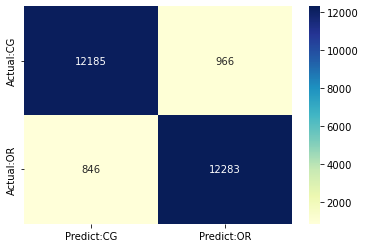

In [51]:
y_train_predict = best_model.predict(x_train_lemmatized)
print_metrics(y_train, y_train_predict)   

Confusion matrix
 [[6194  871]
 [ 880 6207]]
True Positives(TP) =  6207
True Negatives(TN) =  6194
False Positives(FP) =  871
False Negatives(FN) =  880
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7065
           1       0.88      0.88      0.88      7087

    accuracy                           0.88     14152
   macro avg       0.88      0.88      0.88     14152
weighted avg       0.88      0.88      0.88     14152

Classification accuracy : 0.8763
Classification error : 0.1237
Precision : 0.8769
Recall or Sensitivity : 0.8758
Specificity : 0.8767
F-1 score : 0.8764


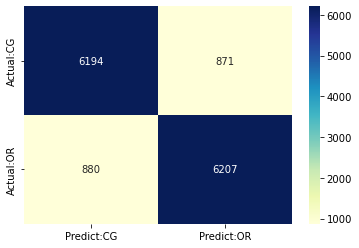

In [52]:
y_test_predict = best_model.predict(x_test_lemmatized)
print_metrics(y_test, y_test_predict)

In [55]:
## Cross val score on X_full and y_full
cross_val_score = cross_val_score(best_model, 
                                  X = X_full, 
                                  y = y_full.values.ravel(), 
                                  cv = 5,
                                  scoring = 'f1',
                                  n_jobs = 2)
print('cross_val_score : ',cross_val_score)


cross_val_score :  [0.87844207 0.88037337 0.88138083 0.88580209 0.86902498]


NameError: name 'mean' is not defined

In [56]:
from statistics import mean
cv_score = mean(cross_val_score)
print('mean cross_val_score : ',cv_score)

mean cross_val_score :  0.8790046688154056
